In [86]:
"""
    value_iteration(
        return_function,  # Return for transitioning from current to next state
        state_space,      # Vector of possible states
        discount_factor;  # Discount factor β ∈ (0,1)
        tolerance=1e-6,
        max_iterations=1000,
        initial_value_function=Dict(s => 0.0 for s in state_space),
        indicator=false
    )

Performs value function iteration for a problem where agent directly chooses next state.

Parameters:
- return_function: Function(current_state, next_state) -> reward
- state_space: Vector of possible states
- discount_factor: Discount factor β ∈ (0,1)
- tolerance: Convergence tolerance
- max_iterations: Maximum number of iterations
- initial_value_function: Initial value function
- capture: capture the value function and policy at certain iterations

Returns:
- value_function: Dictionary mapping states to values
- policy: Dictionary mapping states to optimal next states
- iterations: Number of iterations until convergence
- diffs: Array of iteration-wise maximum values of change in value function
- pdiffs: Array of iteration-wise maximum values of change in policy function
"""
function value_iteration(
    return_function,
    state_space,
    discount_factor;
    tolerance=1e-6,
    max_iterations=1000,
    initial_value_function=Dict(s => 0.0 for s in state_space),
    indicator=false
)
    
    diffs = Float64[] # track differences
    pdiffs = Float64[] # track differences in policy
    captures = []

    # Initialize value function
    value_function = initial_value_function
    policy = Dict(s => s for s in state_space)  # Initial policy: stay at current state
    
    for iter in 1:max_iterations
        max_diff = 0.0
        max_policy_diff = 0.0
        value_function_new = Dict()
        oldpolicy = copy(policy)
        
        # Update value for each current state
        for current_state in state_space
            # Find maximum value over all possible next states
            values = Float64[]
            
            # Try each possible next state
            for next_state in state_space
                # Calculate value of choosing this next state:
                # Current reward + discounted future value
                value = return_function(current_state, next_state) + 
                       discount_factor * value_function[next_state]
                push!(values, value)
            end
            
            # Update value function and policy
            max_value, max_index = findmax(values)
            value_function_new[current_state] = max_value
            policy[current_state] = state_space[max_index]
            
            # Track maximum change
            max_diff = max(max_diff, abs(value_function_new[current_state] - 
                                       value_function[current_state]))
            max_policy_diff = max(max_policy_diff, abs(log(policy[current_state]) - log(oldpolicy[current_state])))
        end

        push!(diffs, max_diff)
        push!(pdiffs, max_policy_diff)
        if indicator
            if iter in [100, 200, 300, 400]
                push!(captures, (iter, copy(value_function_new)))
            end
        end
        
        # Check for convergence
        if max_diff < tolerance
            return value_function_new, policy, iter, diffs, pdiffs, captures
        end
        
        value_function = value_function_new
    end
    
    @warn "Maximum iterations reached without convergence"
    return value_function, policy, max_iterations, diffs, captures
end

value_iteration

In [39]:
function rck(k, k_next)
    # production function: f(k) = Ak^α
    α = 0.33
    A = 1
    δ = 0.1
    
    # Current production
    production = A*k^α
    
    # Investment needed to reach k_next
    investment = k_next - (1-δ)*k  # δ is depreciation rate
    
    # Consumption is production minus investment
    consumption = production - investment
    
    # Return negative infinity for infeasible transitions
    if consumption <= 0
        return -Inf
    end
    
    # Utility from consumption
    return log(consumption)
end

rck (generic function with 1 method)

In [ ]:
# Set up and solve the problem
k_min_1, k_max_1 = (0.1 * 3.53287891716), 3.53287891716
state_space_1 = range(k_min_1, k_max_1, length=401)
discount_factor = 0.96

# Solve the problem
value_function_1, policy_1, iterations_1, diffs_1, pdiffs_1, captures_dump = value_iteration(
    rck,
    state_space_1,
    discount_factor
)

(Dict{Any, Any}(0.78253268015094 => 0.09049204883305673, 3.49313402934195 => 3.7468553813326526, 2.8969607120712 => 3.1763820709244457, 0.8222775679689901 => 0.18327451954830976, 1.02100200705924 => 0.607950330544671, 1.35485906473086 => 1.2136684452684265, 2.3723281928729403 => 2.6078345023124125, 1.7364099877841401 => 1.797039725672825, 0.57585926349708 => -0.45079843129220115, 1.6012773692027702 => 1.6008670568205297…), Dict(0.78253268015094 => 1.0845938275681202, 3.49313402934195 => 3.50108300690556, 2.8969607120712 => 2.98439946527091, 0.8222775679689901 => 1.1243387153861701, 1.02100200705924 => 1.3071651993492002, 1.35485906473086 => 1.61717532432999, 2.3723281928729403 => 2.53130774414514, 1.7364099877841401 => 1.96693033712883, 0.57585926349708 => 0.8779204109142601, 1.6012773692027702 => 1.8476956736746801…), 270, [1.4685522456868598, 0.478922162669023, 0.2834249170819234, 0.2244711050115944, 0.17422995916456463, 0.13334601393715362, 0.10059033757508207, 0.07468960152708726, 

In [ ]:
# Set up and solve the problem
k_min_2, k_max_2 = 3.53287891716, 5.9415725271
state_space_2 = range(k_min_2, k_max_2, length=101)
discount_factor = 0.96

# Solve the problem
value_function_2, policy_2, iterations_2, diffs_2, pdiffs_2, captures_dump = value_iteration(
    rck,
    state_space_2,
    discount_factor
)

(Dict{Any, Any}(5.9174855910006 => 5.5710970111738245, 3.9905307030486 => 4.175993876208065, 5.5561815495096 => 5.334936846120469, 5.459833805112 => 5.2703508674281645, 4.5686171694342 => 4.63355101024412, 4.8094865304282 => 4.813065430675243, 5.4116599329132 => 5.237764856458238, 4.3036608723408 => 4.428802117302365, 3.8219221503528003 => 4.034497717666469, 4.0627915113468 => 4.235456621547348…), Dict(5.9174855910006 => 5.5561815495096, 3.9905307030486 => 3.9182698947504, 5.5561815495096 => 5.2671383163168, 5.459833805112 => 5.1707905719192, 4.5686171694342 => 4.4240955528378, 4.8094865304282 => 4.616791041633, 5.4116599329132 => 5.1226166997204, 4.3036608723408 => 4.1832261918438, 3.8219221503528003 => 3.773748278154, 4.0627915113468 => 3.9905307030486…), 294, [1.2850954187010066, 0.4359280135367336, 0.2801741905818871, 0.21440319291668164, 0.17873203380875857, 0.156297713678768, 0.14078971975398957, 0.12914413251501422, 0.1199483531712362, 0.11240804956706762  …  1.3960216387332025e

In [42]:
print(iterations_1, "\n", iterations_2)

270
294

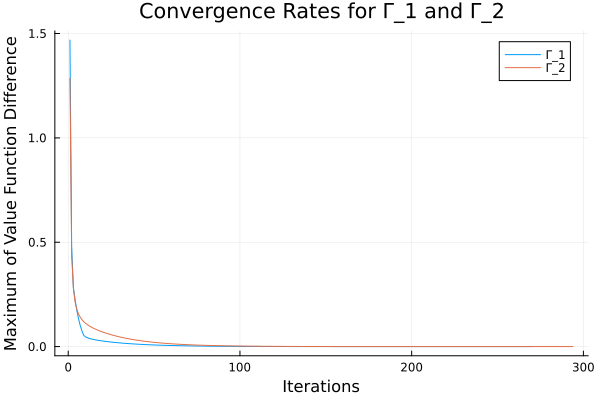

In [43]:
plot(diffs_1[1:iterations_1], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Value Function Difference")
plot!(diffs_2[1:iterations_2], label="Γ_2")

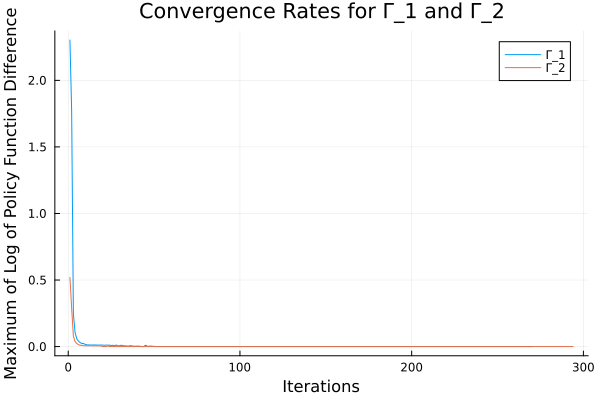

In [44]:
plot(pdiffs_1[1:iterations_1], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Log of Policy Function Difference")
plot!(pdiffs_2[1:iterations_2], label="Γ_2")

In [51]:
w_1 = Dict(s => (((1-0.96)/0.96) * log(s^(0.33) -0.1s)) for s in state_space_1)
w_2 = Dict(s => (((1-0.96)/0.96) * log(s^(0.33) -0.1s)) for s in state_space_2)

Dict{Float64, Float64} with 101 entries:
  5.91749 => 0.00781546
  3.99053 => 0.00688917
  5.55618 => 0.00778555
  5.45983 => 0.0077682
  4.56862 => 0.0073903
  4.80949 => 0.00753465
  5.41166 => 0.00775796
  4.30366 => 0.0071897
  3.82192 => 0.00669545
  4.06279 => 0.0069651
  3.96644 => 0.00686293
  4.47227 => 0.00732266
  5.8934  => 0.00781512
  4.83357 => 0.00754723
  5.07444 => 0.00765564
  5.53209 => 0.00778159
  4.08688 => 0.0069895
  4.0387  => 0.00694024
  4.35183 => 0.00722964
  ⋮       => ⋮

In [64]:
# Solve the problem
value_function_3, policy_3, iterations_3, diffs_3, pdiffs_3, captures_dump = value_iteration(
    rck,
    state_space_1,
    discount_factor,
    initial_value_function=w_1
)

(Dict{Any, Any}(0.78253268015094 => 0.09049178029658422, 3.49313402934195 => 3.74685511279618, 2.8969607120712 => 3.1763818023879735, 0.8222775679689901 => 0.18327425101183703, 1.02100200705924 => 0.6079500620081981, 1.35485906473086 => 1.2136681767319537, 2.3723281928729403 => 2.6078342337759404, 1.7364099877841401 => 1.7970394571363528, 0.57585926349708 => -0.4507986998286747, 1.6012773692027702 => 1.6008667882840577…), Dict(0.78253268015094 => 1.0845938275681202, 3.49313402934195 => 3.50108300690556, 2.8969607120712 => 2.98439946527091, 0.8222775679689901 => 1.1243387153861701, 1.02100200705924 => 1.3071651993492002, 1.35485906473086 => 1.61717532432999, 2.3723281928729403 => 2.53130774414514, 1.7364099877841401 => 1.96693033712883, 0.57585926349708 => 0.8779204109142601, 1.6012773692027702 => 1.8476956736746801…), 270, [1.4464702247768406, 0.4795532676153147, 0.28281905633348314, 0.22388947869309206, 0.1736715978988026, 0.1328099871220214, 0.10007575183255524, 0.07419559921426178, 

In [65]:
# Solve the problem
value_function_4, policy_4, iterations_4, diffs_4, pdiffs_4, captures_dump = value_iteration(
    rck,
    state_space_2,
    discount_factor,
    initial_value_function=w_2
)

(Dict{Any, Any}(5.9174855910006 => 5.571097049844883, 3.9905307030486 => 4.175993914879126, 5.5561815495096 => 5.33493688479153, 5.459833805112 => 5.270350906099225, 4.5686171694342 => 4.63355104891518, 4.8094865304282 => 4.813065469346301, 5.4116599329132 => 5.237764895129298, 4.3036608723408 => 4.428802155973425, 3.8219221503528003 => 4.0344977563375295, 4.0627915113468 => 4.235456660218407…), Dict(5.9174855910006 => 5.5561815495096, 3.9905307030486 => 3.9182698947504, 5.5561815495096 => 5.2671383163168, 5.459833805112 => 5.1707905719192, 4.5686171694342 => 4.4240955528378, 4.8094865304282 => 4.616791041633, 5.4116599329132 => 5.1226166997204, 4.3036608723408 => 4.1832261918438, 3.8219221503528003 => 3.773748278154, 4.0627915113468 => 3.9905307030486…), 294, [1.2833320651273146, 0.4356859246822291, 0.27994178528156244, 0.21418008382837028, 0.17851784908397983, 0.1560920963429795, 0.14059232711163272, 0.12895463557835285, 0.11976643611204096, 0.11223340919023883  …  1.3936949763149187

In [66]:
print(iterations_3, "\n", iterations_4)

270
294

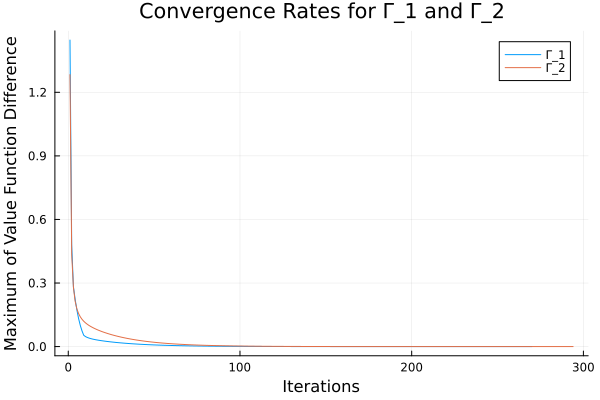

In [55]:
plot(diffs_3[1:iterations_3], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Value Function Difference")
plot!(diffs_4[1:iterations_4], label="Γ_2")

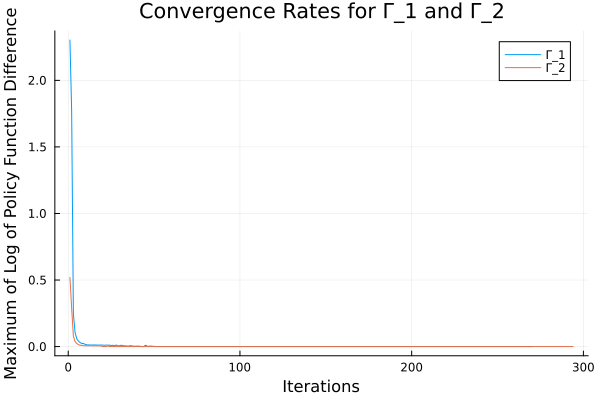

In [56]:
plot(pdiffs_3[1:iterations_3], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Log of Policy Function Difference")
plot!(pdiffs_4[1:iterations_4], label="Γ_2")

In [59]:
w_3 = Dict(s => value_function_1[3.53287891716] for s in state_space_1)
w_4 = Dict(s => (((1-0.96)/0.96) * log(s^(0.33) -0.1s) + (s-3.53287891716)) for s in state_space_2)

Dict{Float64, Float64} with 101 entries:
  5.91749 => 2.39242
  3.99053 => 0.464541
  5.55618 => 2.03109
  5.45983 => 1.93472
  4.56862 => 1.04313
  4.80949 => 1.28414
  5.41166 => 1.88654
  4.30366 => 0.777972
  3.82192 => 0.295739
  4.06279 => 0.536878
  3.96644 => 0.440428
  4.47227 => 0.946713
  5.8934  => 2.36833
  4.83357 => 1.30824
  5.07444 => 1.54922
  5.53209 => 2.007
  4.08688 => 0.560989
  4.0387  => 0.512766
  4.35183 => 0.826185
  ⋮       => ⋮

In [79]:
# Solve the problem
value_function_5, policy_5, iterations_5, diffs_5, pdiffs_5, captures_5 = value_iteration(
    rck,
    state_space_1,
    discount_factor,
    initial_value_function=w_3,
    indicator=true
)

(Dict{Any, Any}(0.78253268015094 => 0.09053910442031166, 3.49313402934195 => 3.7469024369199073, 2.8969607120712 => 3.176429126511701, 0.8222775679689901 => 0.18332157513556446, 1.02100200705924 => 0.6079973861319261, 1.35485906473086 => 1.2137155008556804, 2.3723281928729403 => 2.6078815578996686, 1.7364099877841401 => 1.7970867812600788, 0.57585926349708 => -0.4507513757049466, 1.6012773692027702 => 1.6009141124077846…), Dict(0.78253268015094 => 1.0845938275681202, 3.49313402934195 => 3.50108300690556, 2.8969607120712 => 2.98439946527091, 0.8222775679689901 => 1.1243387153861701, 1.02100200705924 => 1.3071651993492002, 1.35485906473086 => 1.61717532432999, 2.3723281928729403 => 2.53130774414514, 1.7364099877841401 => 1.96693033712883, 0.57585926349708 => 0.8779204109142601, 1.6012773692027702 => 1.8476956736746801…), 282, [1.317247660539874, 0.49054647479292646, 0.4228672227533856, 0.3583357184561977, 0.3027399880713839, 0.2567156416877001, 0.2190251802156058, 0.18838705046199133, 0.

In [80]:
# Solve the problem
value_function_6, policy_6, iterations_6, diffs_6, pdiffs_6, captures_6 = value_iteration(
    rck,
    state_space_2,
    discount_factor,
    initial_value_function=w_4,
    indicator=true
)

(Dict{Any, Any}(5.9174855910006 => 5.571096404189863, 3.9905307030486 => 4.175993269224105, 5.5561815495096 => 5.334936239136511, 5.459833805112 => 5.2703502604442045, 4.5686171694342 => 4.63355040326016, 4.8094865304282 => 4.813064823691283, 5.4116599329132 => 5.237764249474279, 4.3036608723408 => 4.428801510318406, 3.8219221503528003 => 4.03449711068251, 4.0627915113468 => 4.235456014563388…), Dict(5.9174855910006 => 5.5561815495096, 3.9905307030486 => 3.9182698947504, 5.5561815495096 => 5.2671383163168, 5.459833805112 => 5.1707905719192, 4.5686171694342 => 4.4240955528378, 4.8094865304282 => 4.616791041633, 5.4116599329132 => 5.1226166997204, 4.3036608723408 => 4.1832261918438, 3.8219221503528003 => 3.773748278154, 4.0627915113468 => 3.9905307030486…), 293, [0.15755268527406874, 0.1510394068973162, 0.1444539912183096, 0.13797646251280604, 0.13168700937388167, 0.12550963206890386, 0.11977372559560606, 0.11432326286675154, 0.10916958962006995, 0.10451221944222122  …  1.432826520098018

In [81]:
print(iterations_5, "\n", iterations_6)

282
293

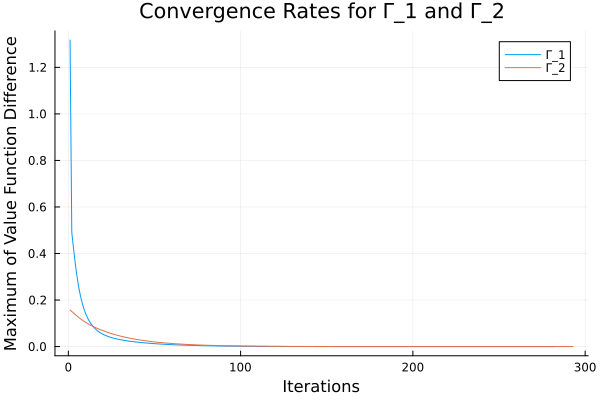

In [82]:
plot(diffs_5[1:iterations_5], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Value Function Difference")
plot!(diffs_6[1:iterations_6], label="Γ_2")

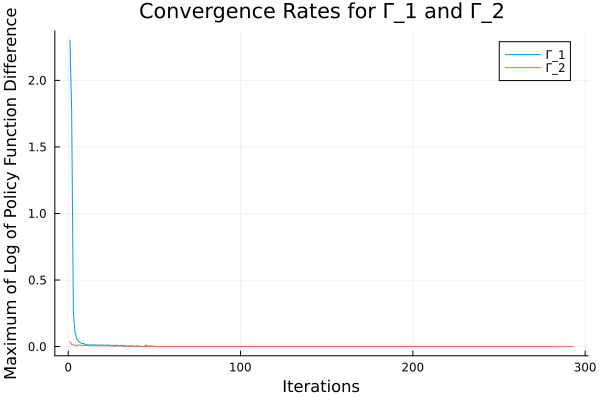

In [68]:
plot(pdiffs_5[1:iterations_5], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Log of Policy Function Difference")
plot!(pdiffs_6[1:iterations_6], label="Γ_2")

In [83]:
for i in 1:length(captures_5)
    plot(state_space_1, collect(values(captures_5[i][2])), label="Γ_1 at Iteration $(captures_5[i][1])", title="Value Function Comparison", xlabel="State", ylabel="Value Function")
    plot!(state_space_2, collect(values(captures_6[i][2])), label="Γ_2 at Iteration $(captures_6[i][1])")
end

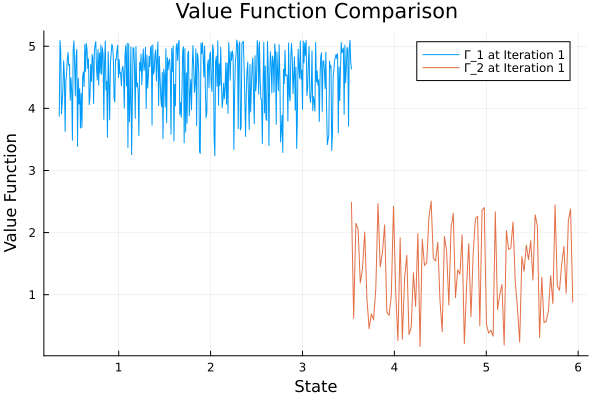

In [84]:
plot(state_space_1, collect(values(captures_5[1][2])), label="Γ_1 at Iteration $(captures_5[1][1])", title="Value Function Comparison", xlabel="State", ylabel="Value Function")
plot!(state_space_2, collect(values(captures_6[1][2])), label="Γ_2 at Iteration $(captures_6[1][1])")

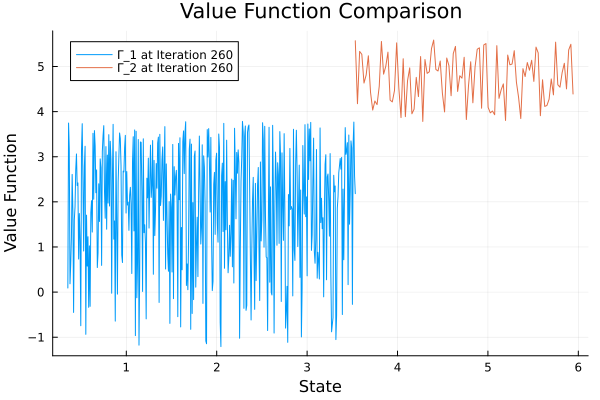

In [85]:
plot(state_space_1, collect(values(captures_5[2][2])), label="Γ_1 at Iteration $(captures_5[2][1])", title="Value Function Comparison", xlabel="State", ylabel="Value Function")
plot!(state_space_2, collect(values(captures_6[2][2])), label="Γ_2 at Iteration $(captures_6[2][1])")

In [88]:
function value_iteration_skip(
    return_function,
    state_space,
    discount_factor;
    tolerance=1e-6,
    max_iterations=1000,
    initial_value_function=Dict(s => 0.0 for s in state_space),
    indicator=false
)
    
    diffs = Float64[] # track differences
    pdiffs = Float64[] # track differences in policy
    captures = []

    # Initialize value function
    value_function = initial_value_function
    policy = Dict(s => s for s in state_space)  # Initial policy: stay at current state
    
    for iter in 1:max_iterations
        max_diff = 0.0
        max_policy_diff = 0.0
        value_function_new = Dict()
        oldpolicy = copy(policy)
        
        # Update value for each current state
        for current_state in state_space
            # Find maximum value over all possible next states
            values = Float64[]
            
            # Try each possible next state
            for next_state in state_space
                # Calculate value of choosing this next state:
                # Current reward + discounted future value
                value = return_function(current_state, next_state) + 
                       discount_factor * value_function[next_state]
                push!(values, value)
            end
            
            # Update value function
            max_value, max_index = findmax(values)
            value_function_new[current_state] = max_value
            
            # Update policy every 2 iterations
            if iter % 2 == 0
                policy[current_state] = state_space[max_index]
            end
            
            # Track maximum change
            max_diff = max(max_diff, abs(value_function_new[current_state] - 
                                       value_function[current_state]))
            if iter % 2 == 0
                max_policy_diff = max(max_policy_diff, abs(log(policy[current_state]) - log(oldpolicy[current_state])))
            end
        end

        push!(diffs, max_diff)
        if iter % 2 == 0
            push!(pdiffs, max_policy_diff)
        end
        if indicator
            if iter in [100, 200, 300, 400]
                push!(captures, (iter, copy(value_function_new)))
            end
        end
        
        # Check for convergence
        if max_diff < tolerance
            return value_function_new, policy, iter, diffs, pdiffs, captures
        end
        
        value_function = value_function_new
    end
    
    @warn "Maximum iterations reached without convergence"
    return value_function, policy, max_iterations, diffs, captures
end

value_iteration_skip (generic function with 1 method)

In [98]:
value_function_7, policy_7, iterations_7, diffs_7, pdiffs_7, captures_dump = value_iteration_skip(
    rck,
    state_space_1,
    discount_factor
)

(Dict{Any, Any}(0.78253268015094 => 0.09049204883305673, 3.49313402934195 => 3.7468553813326526, 2.8969607120712 => 3.1763820709244457, 0.8222775679689901 => 0.18327451954830976, 1.02100200705924 => 0.607950330544671, 1.35485906473086 => 1.2136684452684265, 2.3723281928729403 => 2.6078345023124125, 1.7364099877841401 => 1.797039725672825, 0.57585926349708 => -0.45079843129220115, 1.6012773692027702 => 1.6008670568205297…), Dict(0.78253268015094 => 1.0845938275681202, 3.49313402934195 => 3.50108300690556, 2.8969607120712 => 2.98439946527091, 0.8222775679689901 => 1.1243387153861701, 1.02100200705924 => 1.3071651993492002, 1.35485906473086 => 1.61717532432999, 2.3723281928729403 => 2.53130774414514, 1.7364099877841401 => 1.96693033712883, 0.57585926349708 => 0.8779204109142601, 1.6012773692027702 => 1.8476956736746801…), 270, [1.4685522456868598, 0.478922162669023, 0.2834249170819234, 0.2244711050115944, 0.17422995916456463, 0.13334601393715362, 0.10059033757508207, 0.07468960152708726, 

In [99]:
value_function_8, policy_8, iterations_8, diffs_8, pdiffs_8, captures_dump = value_iteration_skip(
    rck,
    state_space_2,
    discount_factor
)

(Dict{Any, Any}(5.9174855910006 => 5.5710970111738245, 3.9905307030486 => 4.175993876208065, 5.5561815495096 => 5.334936846120469, 5.459833805112 => 5.2703508674281645, 4.5686171694342 => 4.63355101024412, 4.8094865304282 => 4.813065430675243, 5.4116599329132 => 5.237764856458238, 4.3036608723408 => 4.428802117302365, 3.8219221503528003 => 4.034497717666469, 4.0627915113468 => 4.235456621547348…), Dict(5.9174855910006 => 5.5561815495096, 3.9905307030486 => 3.9182698947504, 5.5561815495096 => 5.2671383163168, 5.459833805112 => 5.1707905719192, 4.5686171694342 => 4.4240955528378, 4.8094865304282 => 4.616791041633, 5.4116599329132 => 5.1226166997204, 4.3036608723408 => 4.1832261918438, 3.8219221503528003 => 3.773748278154, 4.0627915113468 => 3.9905307030486…), 294, [1.2850954187010066, 0.4359280135367336, 0.2801741905818871, 0.21440319291668164, 0.17873203380875857, 0.156297713678768, 0.14078971975398957, 0.12914413251501422, 0.1199483531712362, 0.11240804956706762  …  1.3960216387332025e

In [100]:
print(iterations_7, "\n", iterations_8)

270
294

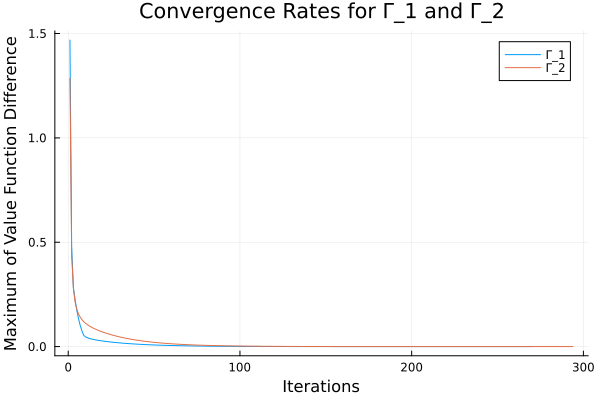

In [101]:
plot(diffs_7[1:iterations_7], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Value Function Difference")
plot!(diffs_8[1:iterations_8], label="Γ_2")

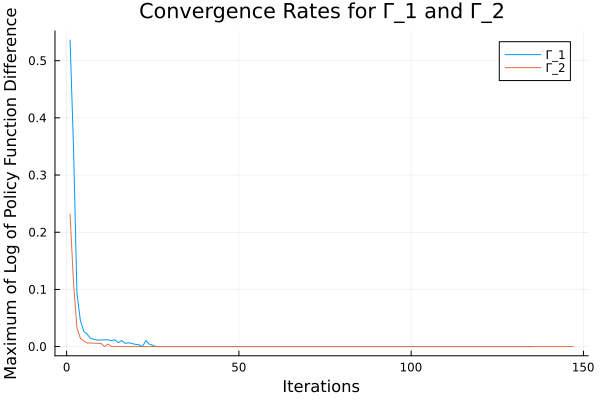

In [105]:
plot(pdiffs_7[1:135], label="Γ_1", title="Convergence Rates for Γ_1 and Γ_2", xlabel="Iterations", ylabel="Maximum of Log of Policy Function Difference")
plot!(pdiffs_8[1:147], label="Γ_2")

In [106]:
"""
    value_iteration_stochastic(
        return_function,  # Return for transitioning from current to next state
        state_space,      # Vector of possible states
        shock_space,      # Vector of possible shocks
        transition_probabilities,  # Matrix of transition probabilities
        discount_factor;  # Discount factor β ∈ (0,1)
        tolerance=1e-6,
        max_iterations=1000,
        initial_value_function=Dict((s, z) => 0.0 for s in state_space for z in shock_space)
    )

Performs value function iteration for a problem with stochastic transitions.

Parameters:
- return_function: Function(current_state, shock, next_state) -> reward
- state_space: Vector of possible states
- shock_space: Vector of possible shocks
- transition_probabilities: Matrix of transition probabilities
- discount_factor: Discount factor β ∈ (0,1)
- tolerance: Convergence tolerance
- max_iterations: Maximum number of iterations
- initial_value_function: Initial value function

Returns:
- value_function: Dictionary mapping (state, shock) to values
- policy: Dictionary mapping (state, shock) to optimal next states
- iterations: Number of iterations until convergence
- diffs: Array of iteration-wise maximum values of change in value function
"""
function value_iteration_stochastic(
    return_function,
    state_space,
    shock_space,
    transition_probabilities,
    discount_factor;
    tolerance=1e-6,
    max_iterations=1000,
    initial_value_function=Dict((s, z) => 0.0 for s in state_space for z in shock_space)
)
    
    diffs = Float64[] # track differences

    # Initialize value function
    value_function = initial_value_function
    policy = Dict((s, z) => s for s in state_space for z in shock_space)  # Initial policy: stay at current state
    
    for iter in 1:max_iterations
        max_diff = 0.0
        value_function_new = Dict()
        
        # Update value for each current state and shock
        for current_state in state_space
            for current_shock in shock_space
                # Find expected value over all possible next states
                values = Float64[]
                
                # Try each possible next state
                for next_state in state_space
                    # Calculate expected value over all possible next shocks
                    expected_value = sum(transition_probabilities[current_shock, next_shock] * value_function[(next_state, next_shock)] for next_shock in shock_space)
                    
                    # Calculate value of choosing this next state:
                    # Current reward + discounted expected future value
                    value = return_function(current_state, current_shock, next_state) + discount_factor * expected_value
                    push!(values, value)
                end
                
                # Update value function and policy
                max_value, max_index = findmax(values)
                value_function_new[(current_state, current_shock)] = max_value
                policy[(current_state, current_shock)] = state_space[max_index]
                
                # Track maximum change
                max_diff = max(max_diff, abs(value_function_new[(current_state, current_shock)] - 
                                           value_function[(current_state, current_shock)]))
            end
        end

        push!(diffs, max_diff)
        
        # Check for convergence
        if max_diff < tolerance
            return value_function_new, policy, iter, diffs
        end
        
        value_function = value_function_new
    end
    
    @warn "Maximum iterations reached without convergence"
    return value_function, policy, max_iterations, diffs
end

value_iteration_stochastic

In [107]:
function stoch_rck(k, z, k_next)
    # production function: f(k) = Ak^α
    α = 0.33
    A = 1
    δ = 0.1
    
    # Current production
    production = ℯ^z * A*k^α
    
    # Investment needed to reach k_next
    investment = k_next - (1-δ)*k  # δ is depreciation rate
    
    # Consumption is production minus investment
    consumption = production - investment
    
    # Return negative infinity for infeasible transitions
    if consumption <= 0
        return -Inf
    end
    
    # Utility from consumption
    return log(consumption)
end

stoch_rck (generic function with 1 method)